In [41]:

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")


In [22]:
df=pd.read_csv("/Unemployment in India.csv")

In [23]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [25]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [26]:
df.fillna(method='ffill', inplace=True)
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [27]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [28]:
print(df.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [29]:
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [30]:
df.head()

,Region,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
Date,,,,,,
2019-05-31,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural
2019-06-30,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural
2019-07-31,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural
2019-08-31,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural
2019-09-30,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

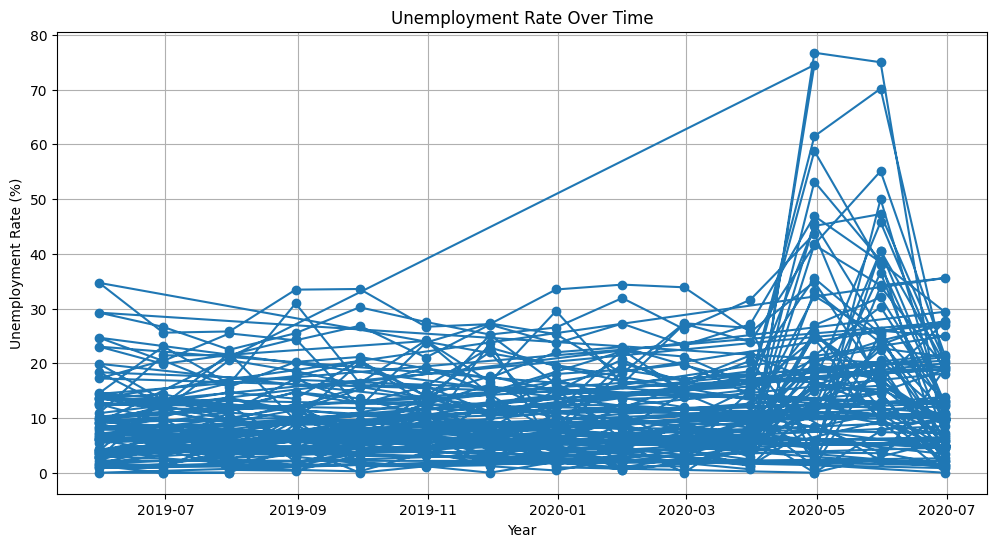

In [35]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Estimated Unemployment Rate (%)'], marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time")
plt.grid(True)
plt.show()


In [38]:
import seaborn as sns

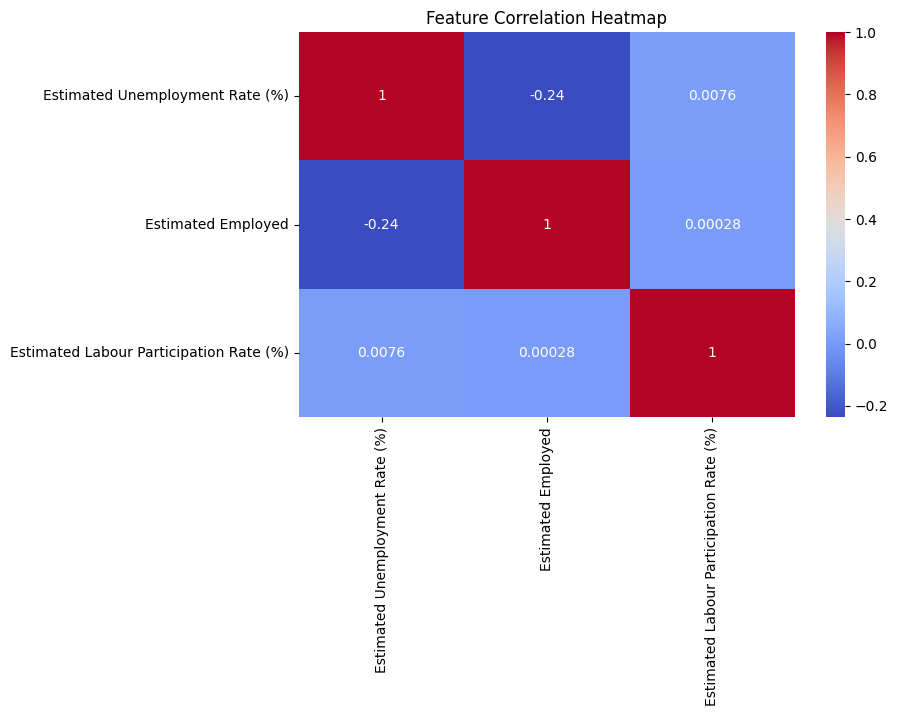

In [39]:
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()



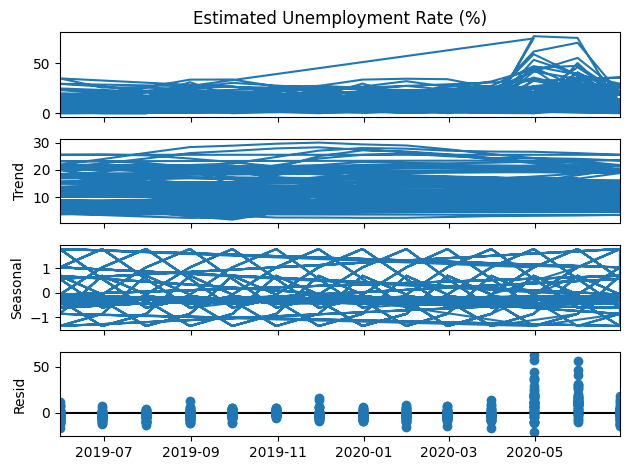

In [48]:

decomposed = seasonal_decompose(df['Estimated Unemployment Rate (%)'], model='additive', period=12)
decomposed.plot()
plt.show()


In [50]:
df['Unemployment_Lag1'] = df['Estimated Unemployment Rate (%)'].shift(1)
df['Unemployment_Lag2'] = df['Estimated Unemployment Rate (%)'].shift(2)
df.dropna(inplace=True)


In [51]:
df = pd.get_dummies(df, columns=['Region'], drop_first=True)


In [52]:
X = df.drop(columns=['Estimated Unemployment Rate (%)'])
y = df['Estimated Unemployment Rate (%)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:


print(X_train.dtypes)


Frequency                                   object
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
Unemployment_Lag1                          float64
Unemployment_Lag2                          float64
Region_Assam                                  bool
Region_Bihar                                  bool
Region_Chandigarh                             bool
Region_Chhattisgarh                           bool
Region_Delhi                                  bool
Region_Goa                                    bool
Region_Gujarat                                bool
Region_Haryana                                bool
Region_Himachal Pradesh                       bool
Region_Jammu & Kashmir                        bool
Region_Jharkhand                              bool
Region_Karnataka                              bool
Region_Kerala                                 bool
Region_Madhya Pradesh          

In [57]:
X_train = X_train.drop(columns=['Frequency'], errors='ignore')
X_test = X_test.drop(columns=['Frequency'], errors='ignore')


In [58]:
X_train = pd.get_dummies(X_train, drop_first=True)  # Convert categories to numerical format
X_test = pd.get_dummies(X_test, drop_first=True)


In [59]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [60]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)

print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")
print(f"R² Score: {r2_score(y_test, y_pred_rf)}")


Random Forest Performance:
MAE: 3.954056493506494
RMSE: 6.811698967003599
R² Score: 0.3238742041953667


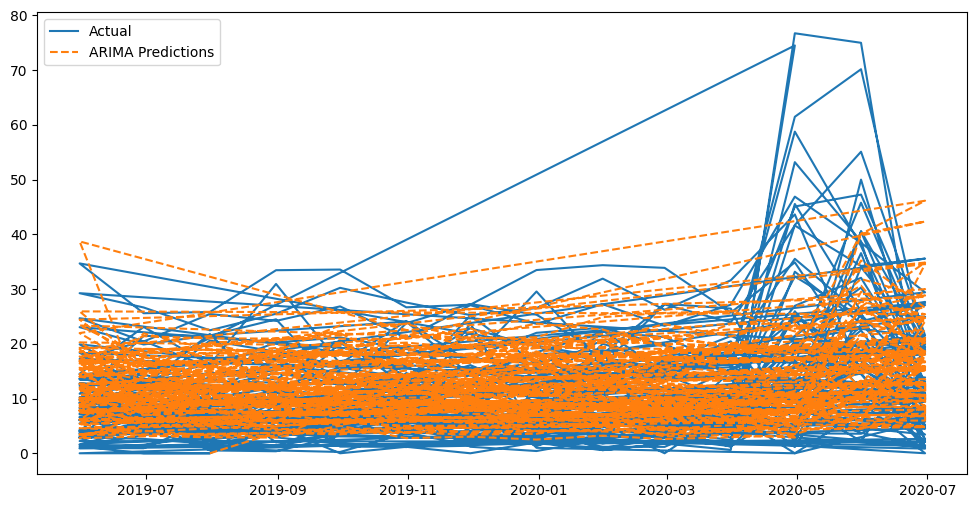

In [61]:
arima_model = ARIMA(df['Estimated Unemployment Rate (%)'], order=(2,1,2))
arima_result = arima_model.fit()
df['ARIMA_Predictions'] = arima_result.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Estimated Unemployment Rate (%)'], label="Actual")
plt.plot(df.index, df['ARIMA_Predictions'], label="ARIMA Predictions", linestyle="dashed")
plt.legend()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa6j4qbe0/2a9kxc9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa6j4qbe0/04x7yfnp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39041', 'data', 'file=/tmp/tmpa6j4qbe0/2a9kxc9x.json', 'init=/tmp/tmpa6j4qbe0/04x7yfnp.json', 'output', 'file=/tmp/tmpa6j4qbe0/prophet_modeld26ip38g/prophet_model-20250328065121.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:51:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:51:21 - cmdstanpy - INFO - Chain

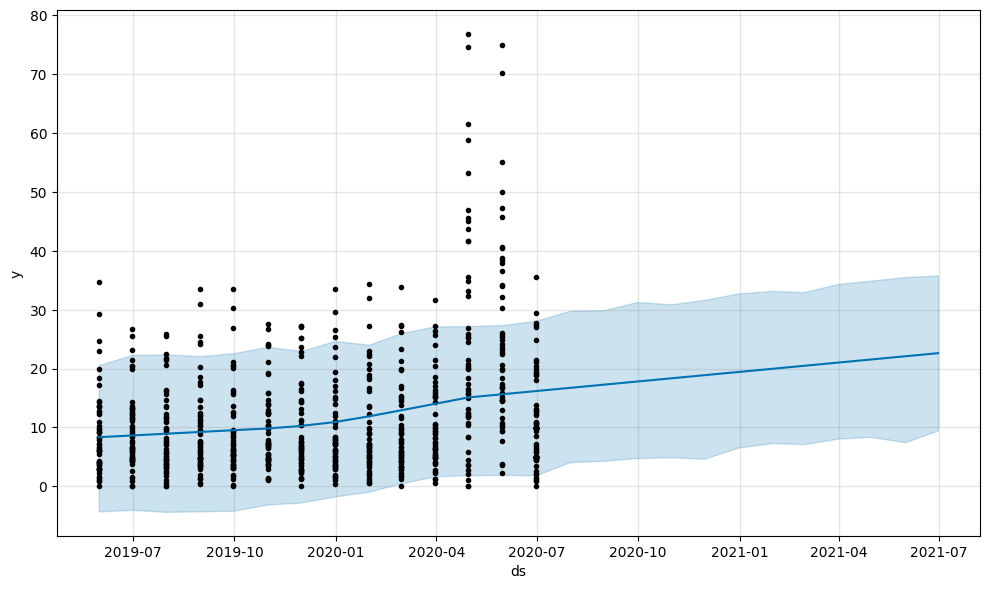

In [67]:

prophet_df = df[['Estimated Unemployment Rate (%)']].reset_index()


prophet_df.columns = ['ds', 'y']


from prophet import Prophet
model = Prophet()
model.fit(prophet_df)


future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


model.plot(forecast)
plt.show()
